In [14]:
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# fm = mp.font_manager.FontManager()
# #한글 지원하는 폰트명으로 재할당
# plt.rcParams['font.family'] = 'Malgun Gothic'
# #plt.rc('font', family='Malgun Gothic')

In [16]:
!apt -qq -y install fonts-nanum > /dev/null
 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
 
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

In [17]:
data_file = '/content/data/코로나(서울구별데이터처리).csv'
df = pd.read_csv(data_file)
df.head()

,확진일,지역
0,2021-07-05,성동구
1,2021-07-05,성동구
2,2021-07-05,송파구
3,2021-07-05,타시도
4,2021-07-05,타시도


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51941 entries, 0 to 51940
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   확진일     51941 non-null  object
 1   지역      51941 non-null  object
dtypes: object(2)
memory usage: 811.7+ KB


In [19]:
#지역 확인
df['지역'].unique()

array(['성동구', '송파구', '타시도', '영등포구', '중랑구', '성북구', '광진구', '양천구', '관악구',
       '강북구', '노원구', '강동구', '강남구', '용산구', '금천구', '동대문구', '서초구', '마포구',
       '은평구', '강서구', '동작구', '서대문구', '구로구', '종로구', '중구', '강남구 ', '도봉구',
       ' 중랑구', '기타', '서초구 ', '마포구 ', '강서구 ', '서대문구 ', '송파구 '],
      dtype=object)

In [20]:
# 필요없는 타시도, 기타 추출
df = df[df['지역']!='타시도' ].copy()
df = df[df['지역']!='기타' ].copy()
df['지역'].unique()

array(['성동구', '송파구', '영등포구', '중랑구', '성북구', '광진구', '양천구', '관악구', '강북구',
       '노원구', '강동구', '강남구', '용산구', '금천구', '동대문구', '서초구', '마포구', '은평구',
       '강서구', '동작구', '서대문구', '구로구', '종로구', '중구', '강남구 ', '도봉구', ' 중랑구',
       '서초구 ', '마포구 ', '강서구 ', '서대문구 ', '송파구 '], dtype=object)

In [21]:
# 타입확인
addr = df['지역'].str.split(expand=True)[0].reset_index()
type(addr)

pandas.core.frame.DataFrame

In [22]:
addr.head()

,index,0
0,0,성동구
1,1,성동구
2,2,송파구
3,6,영등포구
4,7,중랑구


In [23]:
# 공백이 있는 것들 없는 것으로 교체
addr.replace({' 중랑구':'중랑구','강남구 ':'강남구','송파구 ' : '송파구','서초구 ':'서초구','마포구 ':'마포구','강서구 ':'강서구','서대문구 ':'서대문구'})

,index,0
0,0,성동구
1,1,성동구
2,2,송파구
3,6,영등포구
4,7,중랑구
...,...,...
47401,51936,성북구
47402,51937,마포구
47403,51938,종로구
47404,51939,중랑구


In [24]:
# 공백있는 값들이 없어짐을 확인
addr[0].value_counts()

강남구     3461
송파구     3130
강서구     2475
노원구     2370
관악구     2370
서초구     2308
중랑구     2201
은평구     2196
성북구     2137
동작구     2111
강동구     2061
영등포구    1967
동대문구    1891
양천구     1774
마포구     1742
광진구     1726
구로구     1679
도봉구     1555
성동구     1499
용산구     1499
강북구     1464
서대문구    1314
종로구      853
금천구      853
중구       770
Name: 0, dtype: int64

In [25]:
addr2 = addr[0].value_counts().reset_index()
print(type(addr2))
addr2.head()

<class 'pandas.core.frame.DataFrame'>


,index,0
0,강남구,3461
1,송파구,3130
2,강서구,2475
3,노원구,2370
4,관악구,2370


In [26]:
addr2.rename(columns={'index':'구', 0:'확진자수'}, inplace=True)
addr2.head()

,구,확진자수
0,강남구,3461
1,송파구,3130
2,강서구,2475
3,노원구,2370
4,관악구,2370


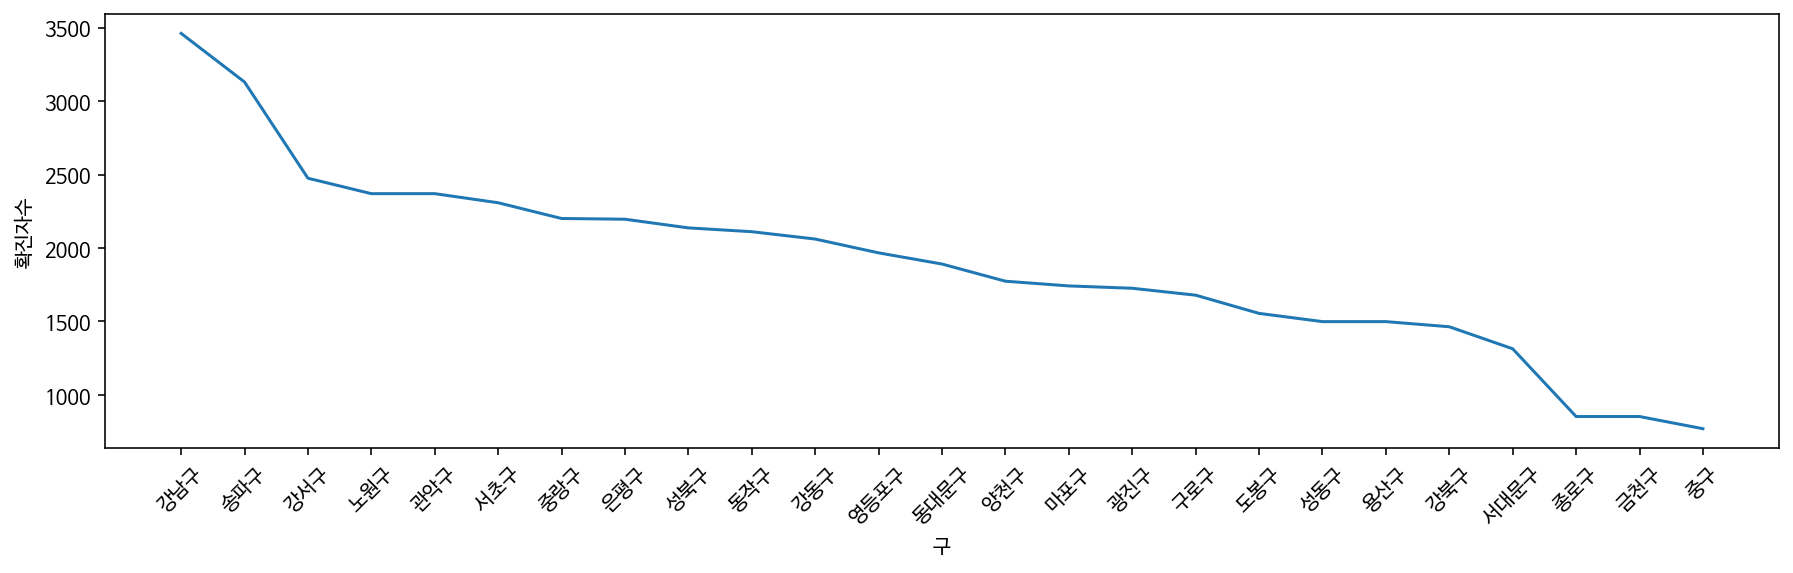

In [27]:
plt.figure(figsize=(15,4))
plt.xticks(rotation=45)
sns.lineplot(data=addr2, x='구', y='확진자수' )